In [1]:
import metpy.calc as mpcalc
from metpy.units import units
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as nt
import scipy.ndimage as ndimage
import xarray as xr
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import ShapelyFeature,NaturalEarthFeature
from shapely.geometry import Polygon
from shapely.ops import cascaded_union
import numpy.ma as ma
import scipy.ndimage as ndimage
from awips.dataaccess import DataAccessLayer
import matplotlib.pyplot as plt
import metpy 
from metpy.plots import USCOUNTIES # Make sure metpy is updated to latest version.


In [2]:
ds = xr.open_dataset('gfs_data\gfs_20181108_18z.nc')
elev = xr.open_dataset('C:/Users/Matthew/Documents/SJSUsummer2018/GMTED2010_15n030_0125deg.nc')


In [3]:
wp_lat =  39.697254
wp_lon = -121.574221+360

lat = ds.lat_0
lon = ds.lon_0
               
abslat = np.abs(lat-wp_lat)
abslon= np.abs(lon-wp_lon)
c = np.maximum(abslon,abslat)
xx, yy = np.where(c == np.min(c))
print(xx,yy) 

[477] [101]


In [8]:
height = ds.HGT_P0_L100_GLL0[:,int(yy-30):int(yy+30),int(xx-35):int(xx+35)]
uwind_pres = ds.UGRD_P0_L100_GLL0[:,int(yy-30):int(yy+30),int(xx-35):int(xx+35)]
vwind_pres =ds.VGRD_P0_L100_GLL0[:,int(yy-30):int(yy+30),int(xx-35):int(xx+35)]
uwind_10m = ds.UGRD_P0_L103_GLL0[0,int(yy-30):int(yy+30),int(xx-35):int(xx+35)]
vwind_10m = ds.VGRD_P0_L103_GLL0[0,int(yy-30):int(yy+30),int(xx-35):int(xx+35)]
RH = ds.RH_P0_L100_GLL0[:,int(yy-30):int(yy+30),int(xx-35):int(xx+35)]
RH_2m =ds.RH_P0_L103_GLL0[int(yy-30):int(yy+30),int(xx-35):int(xx+35)]
lon_2d, lat_2d = np.meshgrid(ds['lon_0'][int(xx-35):int(xx+35)], ds['lat_0'][int(yy-30):int(yy+30)])

In [9]:
# Function used to create the map subplots
def plot_background(ax):
    ax.set_extent([-105+360.,-138+360., 32., 52.])
    ax.coastlines(resolution='10m', linewidth=2, color = 'white', zorder = 4)
    political_boundaries = NaturalEarthFeature(category='cultural',
                                   name='admin_0_boundary_lines_land',
                                   scale='10m', facecolor='none')
    states = NaturalEarthFeature(category='cultural',
                                   name='admin_1_states_provinces_lines',
                                   scale='50m', facecolor='none')

    ax.add_feature(political_boundaries, linestyle='-', edgecolor='white', zorder =4)
    ax.add_feature(states, linestyle='-', edgecolor='white',linewidth=2, zorder =4)
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return ax

In [10]:
crs = ccrs.PlateCarree()
heights_700 = ndimage.gaussian_filter(height[22], sigma=1.5, order = 0)

No handles with labels found to put in legend.


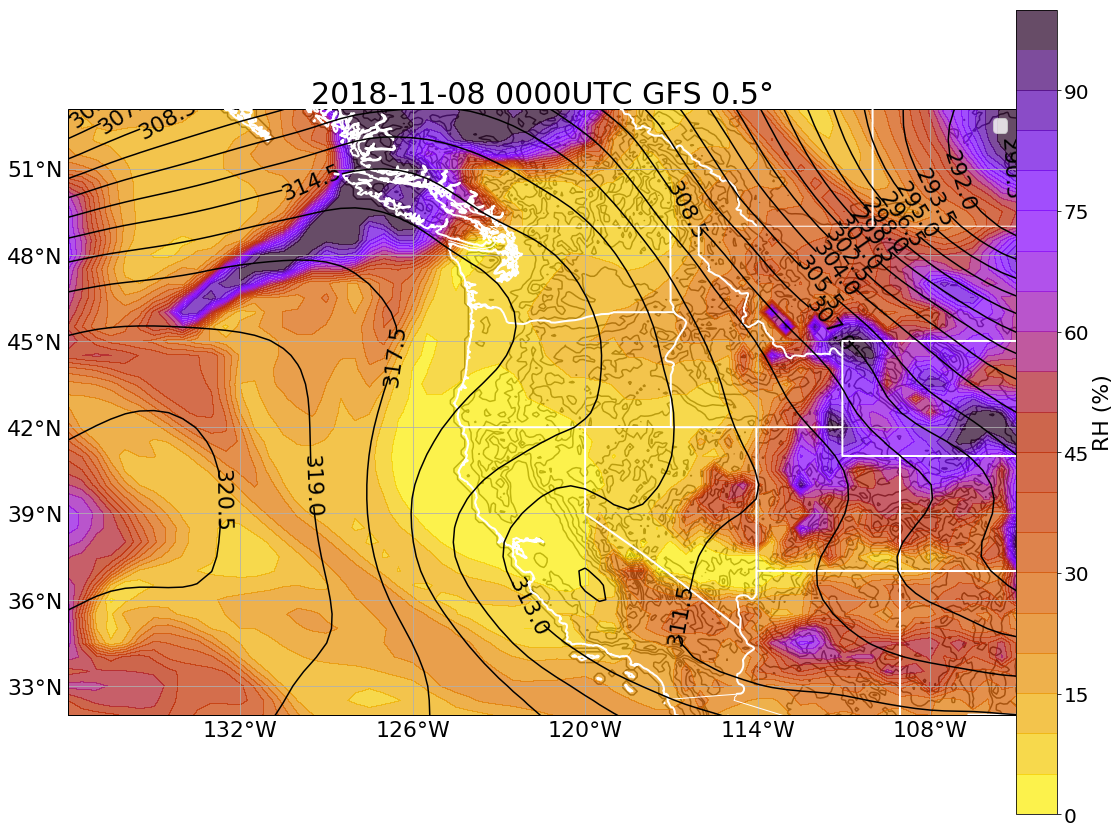

In [11]:
%matplotlib inline
plt.rcParams.update({"font.size":22})
fig, ax = plt.subplots(figsize = (20,20),subplot_kw={'projection': ccrs.PlateCarree()})
plot_background(ax)
clevs = np.arange(0.,105.,5)
levs = np.arange(0,6000.,500)
levs2 = np.arange(250,325.,1.5)
cf = ax.contourf( lon_2d,lat_2d, RH[22].values,clevs, transform = ccrs.PlateCarree(), cmap = 'gnuplot_r', alpha = .7, zorder = 2)
cs1 =ax.contour(elev.longitude,elev.latitude, elev.elevation, levs, transform = ccrs.PlateCarree(), colors = '#333333', zorder = 1)
cs =ax.contour(lon_2d,lat_2d, heights_700/10,levs2, transform = ccrs.PlateCarree(), colors = 'k', zorder = 6 )
ax.clabel(cs,colors='k', fmt = '%.1f')

#ax.scatter(-121.6219, 39.7596, s =300,  marker = '*', label = 'Paradise, California', transform = ccrs.PlateCarree(), color = 'tab:red')
#ax.barbs(uwind_pres[22].lon_0, uwind_pres[22].lat_0, uwind_pres[22].values, vwind_pres[22].values, transform = ccrs.PlateCarree())
ax.set_title('2018-11-08 0000UTC GFS 0.5°', fontsize = 30)

ax.legend(loc = 1,fontsize = '18')
cb = fig.colorbar(cf, shrink=0.5, pad=0.01)
font_size = 20 # Adjust as appropriate.
cb.ax.tick_params(labelsize=font_size)
cb.set_label('RH (%)', size = 'x-large', fontsize = 22 )
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(30)
    label.set_fontweight('bold');

#plt.savefig('700RH_08_00z.png', dpi = 500, bbox_inches = 'tight')

In [ ]:

var = RH_2m
max_lat = 40.5
min_lat = 37.5
min_lon = -123
max_lon = -120.5

fig, ax = plt.subplots(figsize = (20,20),subplot_kw={'projection': crs})
#plot_background(ax)

clevs = np.arange(0.,105.,10)
levs = np.arange(0,6000.,250)
levs2 = np.arange(1,3000.,250)
#cf = ax.contourf(var.lon_0,var.lat_0,var[1], clevs, transform = ccrs.PlateCarree(), cmap = 'viridis_r', alpha = .7, vmax = 80)
#cs1 =ax.contour(elev.longitude,elev.latitude, elev.elevation, levs, transform = ccrs.PlateCarree(), colors = '#333333')
sknum = 1
skip=(slice(None,None,sknum),slice(None,None,sknum))
ax.streamplot(lon_2d,lat_2d, uwind_10m.values, vwind_10m.values, transform= ccrs.PlateCarree(), density = 250)#, color = 'k', units = 'inches', scale = 1)
#ax.quiverkey(q, 0.9, 0.9, 1, r'$2 \frac{m}{s}$', labelpos='E',
#coordinates='figure')
ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())


In [ ]:
ds.PRES_P0_L1_GLL0[4]/100

In [ ]:

uwind_10m[4].data